<a href="https://colab.research.google.com/github/tamburins/ESAA_2023/blob/main/ESAA_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap/notebook

# Customers clustering : K-Means, DBSCAN and AP

머신러닝을 이용하여 상점의 고객 세그멘테이션을 수행하는 것을 보여주는 것으로 비지도 클러스터링 문제와 세개의 대중적인 알고리즘이 제시되고 비교된다. 
알고리즘 수정과 현재 상태 민 개발 연구에 대한 얘깃거리가 좀 있으며 주 목표는 클러스터링 방법의 기초를 다루고 진보된 측면을 좀 다뤄보는 것이다.

여섯개의 주 파트로 나뉜다.

#1.Introduction

클러스터링의 주요 업무는 자연 그룹을 라벨링되지 않은 데이터셋안에서 찾아내는 것으로 이것은 비지도 머신러닝 업무를 얘기한다. 그리고 가장 중요한 것은 많이 쓰인다는 것이다. 많은 적용들 중 하나는
- 효율적인 마케팅을 위한 고객 segmentation
- 이미지 segmentation
- 서류 클러스터링
으로 주로 계층화와 부분화로 나뉜다.

- 계층화 알고리즘은 데이터셋을 집단이 한개의 아이템만을 가질 때까지 더 작은 집단을 ㅗ쪼개는 것으로 이것은 트리와 유사한 dendrogram 형태이다. 이것은 roo의 잎으로 부터 혹은 뿌리에서 나뭇잎까지 오는 방식으로 건설된다. 계층 클러스터링에서는 클러스터의 수를 검사할 필요는 없으나 종료상황을 정의내려야 한다.

- 부분적 알고리즘은 데이터셋을 몇개의 집단으로 나누는데 이는 주어진 기준을 바탕으로 진행된다. 몇몇 알고리즘은 우선순위가 있고 몇몇은 그렇지 않다. 알고리즘 수행 전 클러스터의 수를 정의내리는 것은 힘들게도 도메인 지식을 필요로한다. 

현재 많은 수의 clustering 알고리즘이 존재하며 지배적인 하나는 없다. 가장 최적의 하나를 선택하는 것은 데이터베이스에 의거하며 이것의 적용과 고객 수요 그리고 예상에 관한 데이터베이트슬ㄹ 의미한다. 우리는 세개의 KMEANS, DBSCAN, AFFINITY 전파라는 부분 알고리즘에 집중하며 사이킷런으로 수행된다

#2.REading data


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print('pandas version: {}'.format(pd.__version__))
print('numpy version: {}',format(np.__version__))
print('seaborn version: {}'.format(np.__version__))

pandas version: 1.4.4
numpy version: {} 1.22.4
seaborn version: 1.22.4


In [2]:
mall_data = pd.read_csv('/content/drive/MyDrive/ESAA/OB/Mall_Customers.csv')
print(' there are {} rows and {} columns in our datasets.'.format(mall_data.shape[0], mall_data.shape[1]))

 there are 200 rows and 5 columns in our datasets.


In [3]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,59,Female,27,46,51
199,200,Male,30,137,83
194,195,Female,47,120,16
165,166,Female,36,85,75
94,95,Female,32,60,42
35,36,Female,21,33,81
20,21,Male,35,24,35
174,175,Female,52,88,13
181,182,Female,32,97,86
49,50,Female,31,40,42


In [4]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- Customer ID - numerical - unique - 

- customer number - integer

- Gender - categorical - binary (Male/Female)

- Age - numerical - integer

- Annual Income (k$) - numerical - integer

- Spending Score (1-100) - numerical - integer
이라는 다섯개의 칼럼이 존재하며 하나의 binary 범주형 컬럼인 gender 이 존재한다. 원핫인코딩을 시도할 수 잇는데, 이는 기술적으로 불가하며 이론적으로 금지되었고 실용적으로 추천되지 않는다.

In [5]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

결측치는 없으며 이러한 간단 분석은 실제에서 불가능한 시나리오이다.

# 3. EDA
데이터에 대한 기본적인 통계조사를 포함하며 매우 중요한데 이것은 데이터에대한 더 나은 이해를 하는데 있어 크기 때문이다, 이것은 분포와 상관관계로 크게 나뉜다.

## 3.1 distributions
이 파트에서는 연속변수의 분포가 조사되어진다. 데이터는 단독적인 성별이라는 범주형 변수에 의해 계층화된다.

<ipython-input-7-3e4b818f9426>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-7-3e4b818f9426>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_age, bins=age_bins, kd

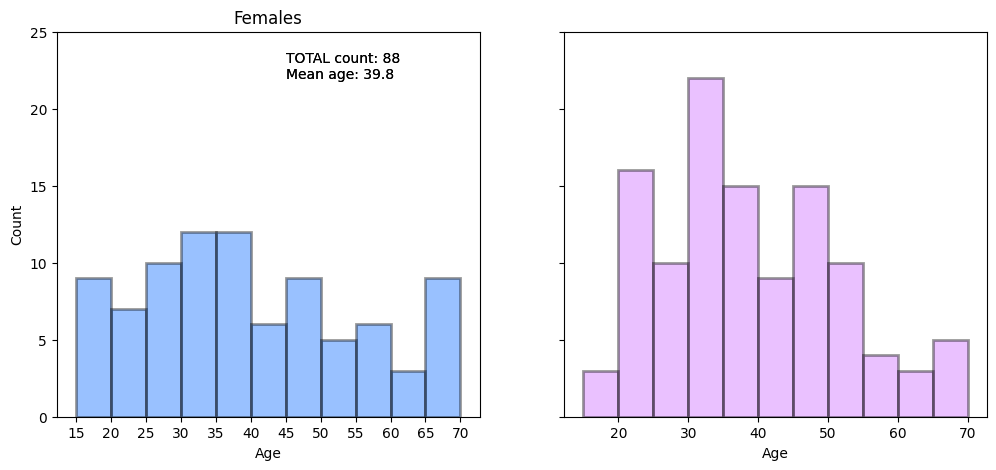

In [7]:
males_age = mall_data[mall_data['Gender']=='Male']['Age']
females_age = mall_data[mall_data['Gender']=='Female']['Age']
age_bins = range(15,75,5)

fig2, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))


sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Females')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

plt.show()

In [8]:
print('Kolgomorov Smirnov test p-value: {:2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov Smirnov test p-value: 0.487007


남성고객의 평균은 여성고객의 평균보다높다. 남성 나이의 분포는 여성 분포에 비해 비교적 균등하며 여성분포에서는 30-35세의 나이가 가장 많았다. KS 검정은 두 그룹 사이의 통계적 insignificant한 차이를 명백히 보여준다

TypeError: ignored

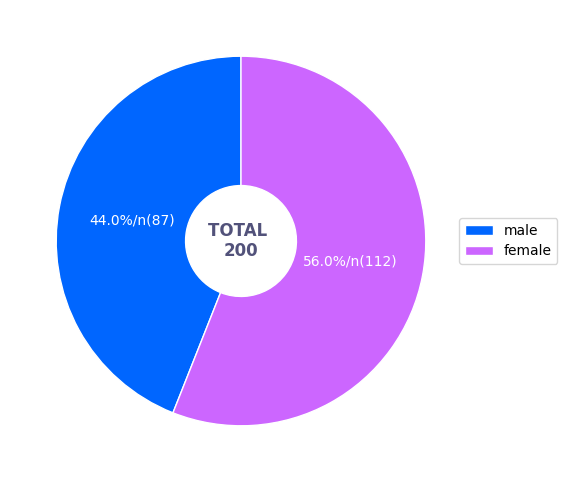

In [9]:
def labeler(pct, allvals):
  absolute = int(pct/100.*np.sum(allvals))
  return '{:.1f}%/n({:d})'.format(pct, absolute)

sizes = [males_age.count(), females_age.count()]

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes, autopct=lambda pct:labeler(pct, sizes),
                                  radius=1, colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))
ax1.legend(wedges, ['male', 'female'],
           loc='center right',
           bbox_to_anchor=(0.7,0,0.5,1))
plt.text(0,0, 'TOTAL \n{}'.format(mall_data['Age'].count()),
                                  weight='bold', size=12, color='#52527a',
                                  ha='center', va='center')
plt.step(autotexts,size=12, weight = 'bold')
ax1.axis('equal')
plt.show()

<ipython-input-11-7d55954aad6f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-11-7d55954aad6f>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_income, bins=my_bi

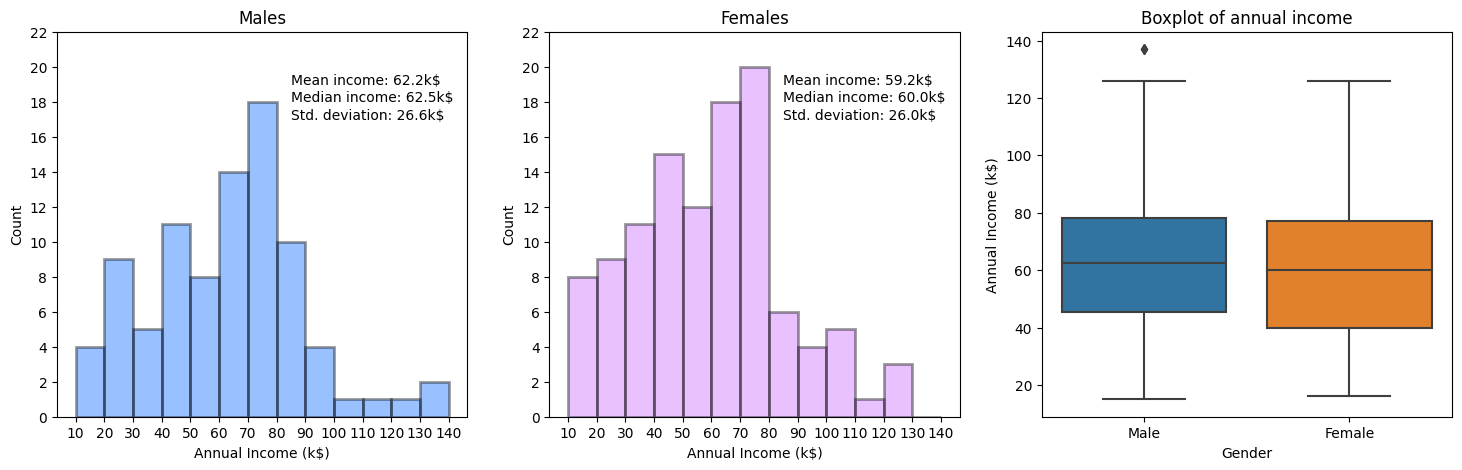

In [11]:
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)',data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [12]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


남성의 평균 수익이 여성의 평균수익보다 높다. 또한 중간값또한 남성이 높으며 표준편차는 두 그룹에서 유사하다. 남성그룹에서 한가지 이상치가 감지된다. k-s 검정결과 두 그룹에 통계적으로 다르지 않음을 볼 수 있다.

<ipython-input-13-f52ebafc36a0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
<ipython-input-13-f52ebafc36a0>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females_spending, 

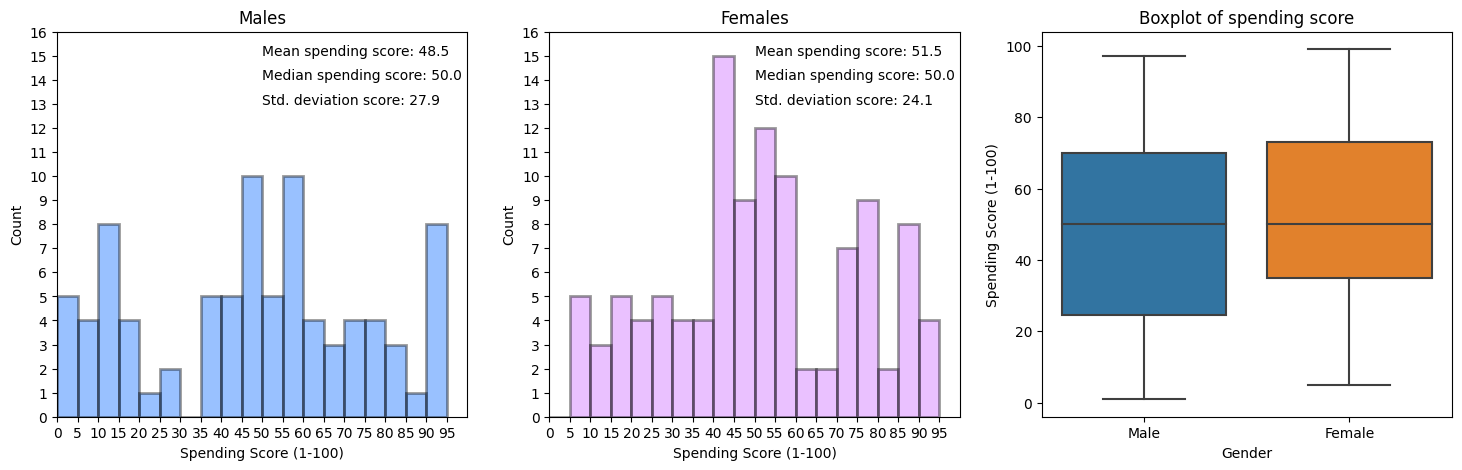

In [13]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)']
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)']
spending_bins = range(0,100,5)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

In [14]:
print('Kolgomorov Smirnove test pvalue: {:.2f} '.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov Smirnove test pvalue: 0.29 


평균 소비점수는 남성의 것에 비해 높으며 ks pvalue는 null가정을 기각하기엔 증거가 없다고 주장할만 하나 이전 비교에 비해 증거거 강력하지 않다. 다음으론 수입의 중간값을 전연령에 대해 계산해보겟다

In [15]:
medians_by_age_group = mall_data.groupby(['Gender', pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

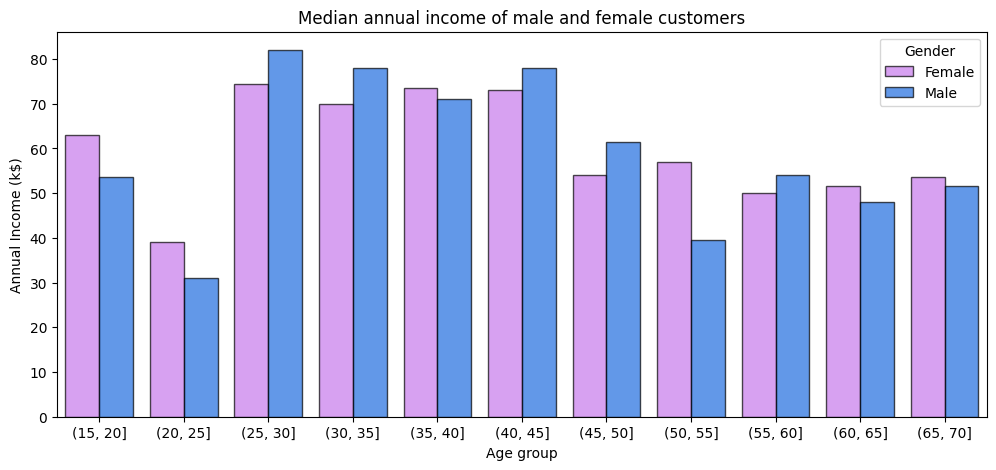

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)',  hue='Gender', data=medians_by_age_group,
             palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

bar chart는 대부분의 부유한 고객층이 25-45세에 분포해있음을 확인한다. 성별간 가장 가시적인 차이는 남성에선 젊은 층이, 여성에선 중년층이 가장 부유하다는 것이다.

## 3.2 correlations
이 부분은 연속형 범주 사이의 상관관계를 파악한다.

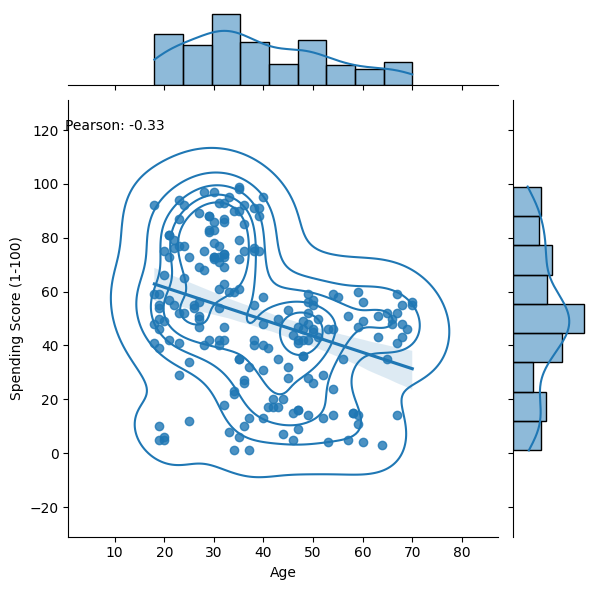

In [21]:
from scipy.stats import pearsonr

corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])
jp = (sns.jointplot(x='Age', y='Spending Score (1-100)', data=mall_data,kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

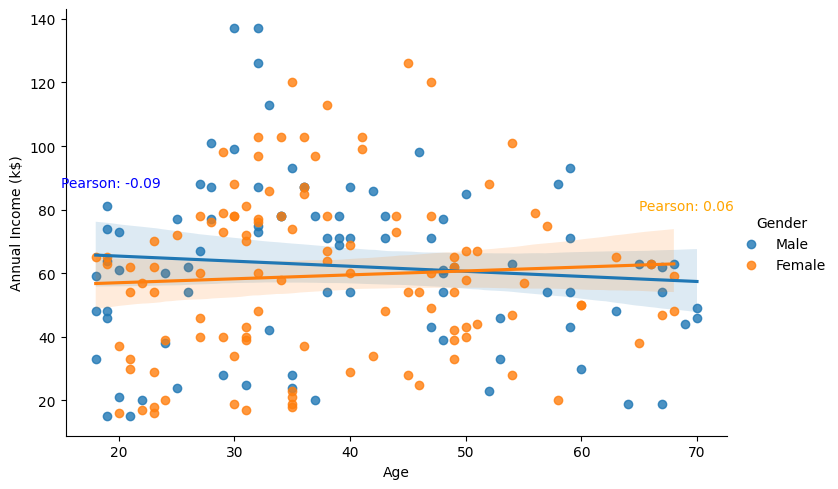

In [22]:
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x='Age', y='Annual Income (k$)', data=mall_data, hue='Gender',aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

negligible한 상관관계가 나이와 연간소득에 있다,

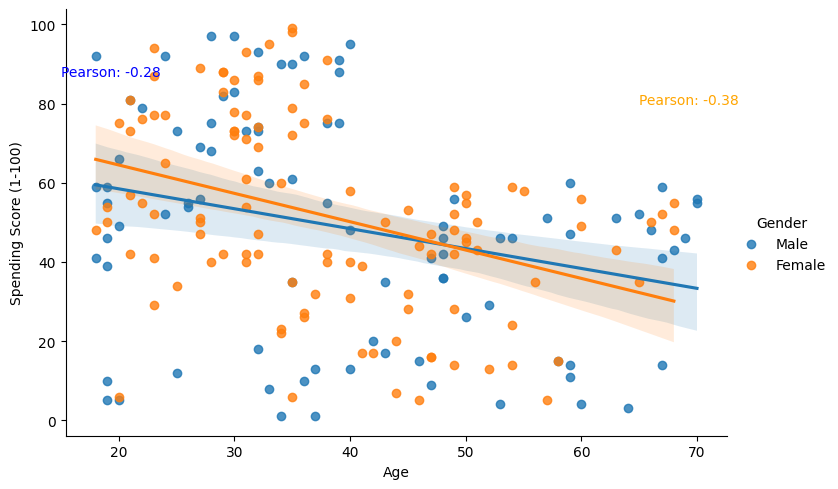

In [24]:
corr1, _ = pearsonr(males_age, males_spending)
corr2, _ =pearsonr(females_age, females_spending)

sns.lmplot(x='Age', y='Spending Score (1-100)', data=mall_data, hue='Gender', aspect=1.5)
plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

약한 부정의 상관관계가 소비점수와 나이 사이에서 두 성별 모두 나타난다.

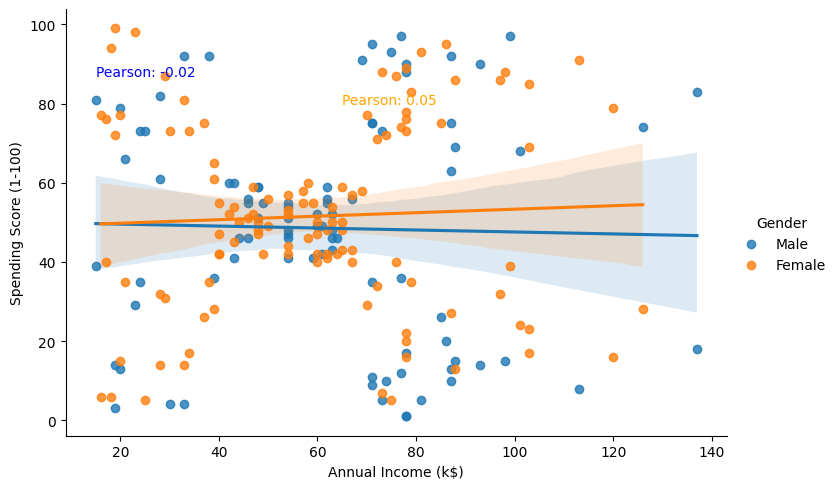

In [26]:
corr1, _ = pearsonr(males_income, males_spending)
corr2, _ =pearsonr(females_income, females_spending)

sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=mall_data, hue='Gender', aspect=1.5)
plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

negiligible한 상관관계가 연간소득과 소비점수 사이에서 두 성별 모두에서 나타난다.

# 4. Clsutering
이 부분은 클러스터링 알고리즘을 어째 사용하는지 기술하고 설명한다.

데이터를 표준화하진 않았다. 

## 4.1 Kmenas
대부분의 머신러닝에서 가르쳐주는 kmenas를 다룬다.이 부분은 두개의 서브챕터를 포함하는데 이것은 알고리즘에 대한 설명과 사용하는 부분이다.

### 4.1.1 Description
가장 대중적인 부분 클러스터링 알고리즘으로서 독립적으로 개발되었다. 크게 세 단계로 나뉘는데
1) seed points를 이용하여 샘플의 초기 쪼개기 2) 샘플간 중심점으로부터의 거리 측정하고 가장 가까운 샘플부터 할당하기 3) 새로 생성된 클러스터 중심으로부터 또 계산하기 로 나뉜다.

이것은 np-hard 문제로 알려져있는데 이것은 탐욕스러운 알고리즘이고 지역 최솟값으로 수렴한다.  수치적 비용은 복잡도 O으로 이는 클러스터와 샘플의 곱으로 나타낸다. 비록 이러한 수렴에도 불구하고 k평균은 빠르고 그룹끼리 고립이 잘 될 때 글로벌 미니멈에 잘 수렴하는 것처럼 보인다. 클러스터링의 결과가 초기기준에 의존하기 때문에 초기의 다양한 시작점에 대한 분서을 수행하고 그 중 최소한의 inertia를 선택하는 것이 일반적이다. 이 외에도 몇몇 개선 방법이 존재한다.

일반적으로 kmenas vudrbsdms tprodml wn vkfkalxjfh wjddmlehlsek

1. initialisation criteria

사이킷런에서 현명한 초기전략은 kmeans ++을 수애하는것으로 이것은 초기 센트로이드를 각자 다른 결과의 증가된 가능성으로부터 얻는다. 또한 랜덤포인트 발생기를 얻는 가능성도 존재한다.끊임없이 지금도 가장 효율적인 알고리즘을 얻기위해 노력중이며 그중 하나는 독립 요소 분석이다.

2. cluster 숫자
클러스터 숫자를 선택하는 것은 가장 어려운 부분이다. 수학적인 기준이 없다. 가장 간단한 방법이자 대중적인 방법은 여기서 사용되는 엘보 메소드와 대중적으로 사용되는 실루엣 메소드다.

1. 또한 거리를 측정하는 데에도 많은 방법이 잇는데 유클리디안 거리법이 주로 사용된다. 이것은 spherical에서만 적욛ㅇ되며 다차원ㄷ에서는 팽창된다는 단접이 있다.

> 여기서는 유클리디안 거리측정법으로 거리를 측정하고 centroid가 평균거리로부터 측정될 것이며 등방위이자 convex cluster를 생성할 것이다.

### 4.1.2 Use case - customers segmentation

In [28]:
from sklearn.cluster import KMeans
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

클러스터 개수를 찾는 방법은 엘보메소드로 2-10의 클러스터 숫자에 대한 inertia가 계산될 것이다. 규칙은 그래프의 엘보가 되는 지점을 찾는 것이다.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

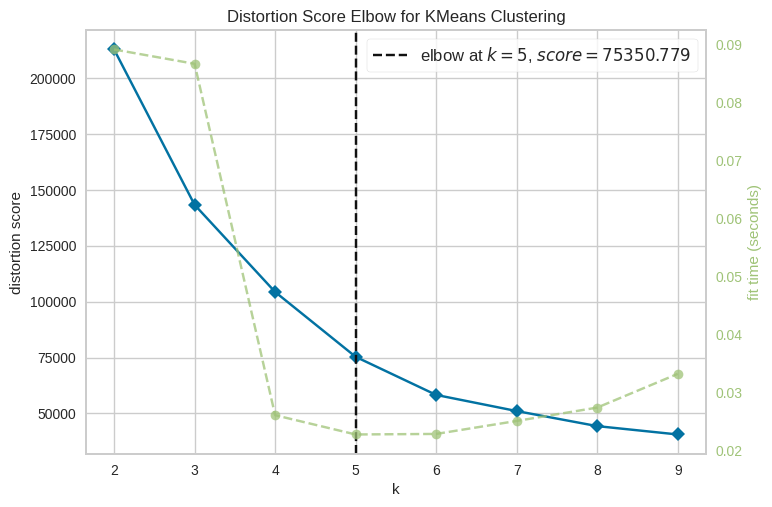

In [29]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))


visualizer.fit(X_numerics)
visualizer.show()
plt.show()

명백한 엘보가 보이지 않는다. 다른 방법은 실루엣 스코어를 쓰는 방법도 있다.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

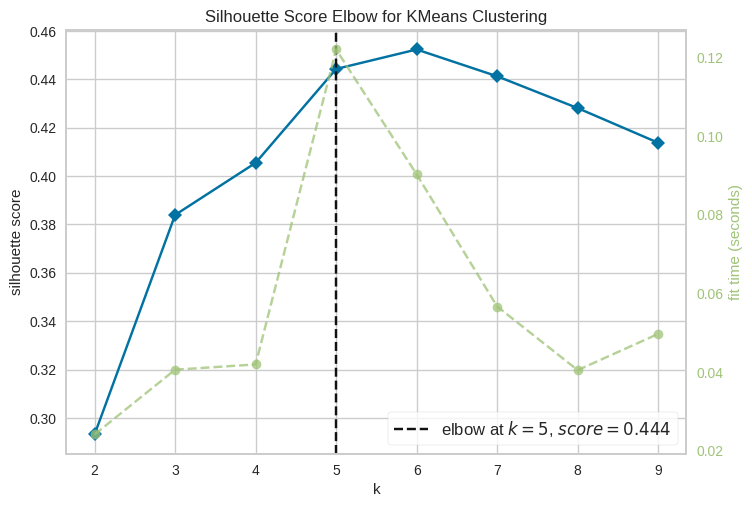

In [30]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric ='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

실루엣 스코어 기준 최적의 클러스터는 5,6으로 이를 비교해보자

#### 5 cluster

In [31]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics)

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:, 'Cluster'] = KM_5_clusters.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


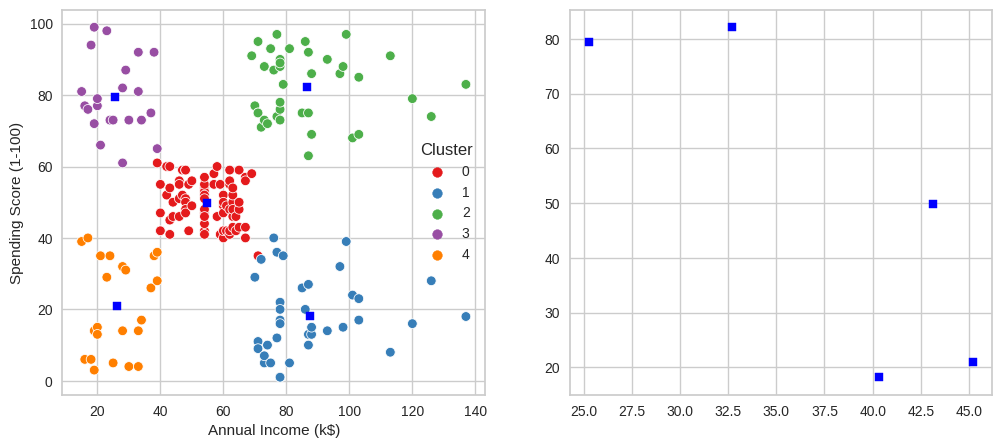

In [34]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,hue='Cluster', ax=axes[0], palette='Set1', legend='full')
axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

kmeans는 다섯개의 클러스터를 발생시켰다.

낮은 소득과 높은 소비스코어으 ㅣ계츠ㅇ, 중간 소득과 중간 소비점수, 높은 소득과 낮은 소비점수, 높은 연간 소득과 높은 소비점수, 낮은 연간소득과 낮은 소비점수!

클러스터 사이즈를 보자

In [35]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns= ['KM_size']
KM_clust_sizes

,KM_size
Cluster,
0,79
1,37
2,39
3,22
4,23


가장 큰 클러스터는 79개의 관측치를 갖는 것으로 두개의 작은 것들이 옆에 있다. 3d로 보면 편리해요!

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig, rect=[0,0,.99,1], elev=20, azim=210)
ax.scatter(KM5_clustered['Age'],
           KM5_clustered['Annual Income (k$)'],
           KM5_clustered['Spending Score (1-100)'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

<ipython-input-36-04600b9148ef>:10: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-36-04600b9148ef>:11: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-36-04600b9148ef>:12: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])
<ipython-input-36-04600b9148ef>:17: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


<Figure size 700x700 with 0 Axes>

In [37]:
#plot version
import plotly as py
import plotly.graph_objs as go

def tracer(db,n,name):

  return go.Scatter3d(
      x = db[db['Cluster']==n]['Age'],
      y = db[db['Cluster']==n]['Spending Score (1-100)'],
      z = db[db['Cluster']==n]['Annual Income (k$)'],
      mode = 'markers',
      name = name,
      marker = dict(
        size = 5
        )
  )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### Clusters by K-Means
각각의 클러스터를 실루엣 플랏으로 조사할 수 있다.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



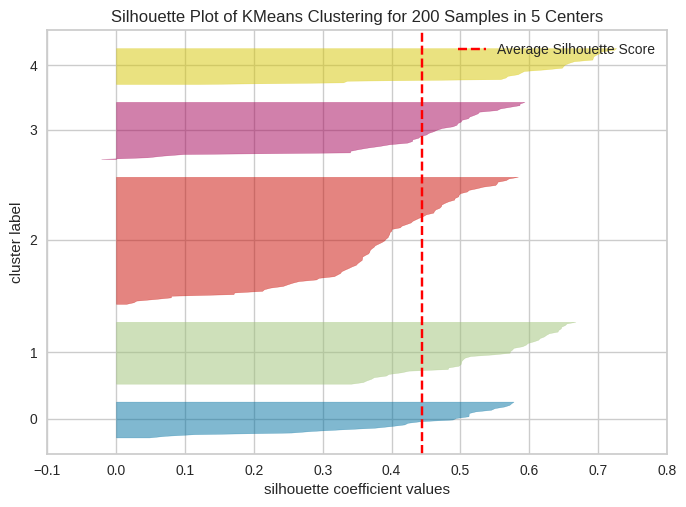

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

### 6 clusters

In [39]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



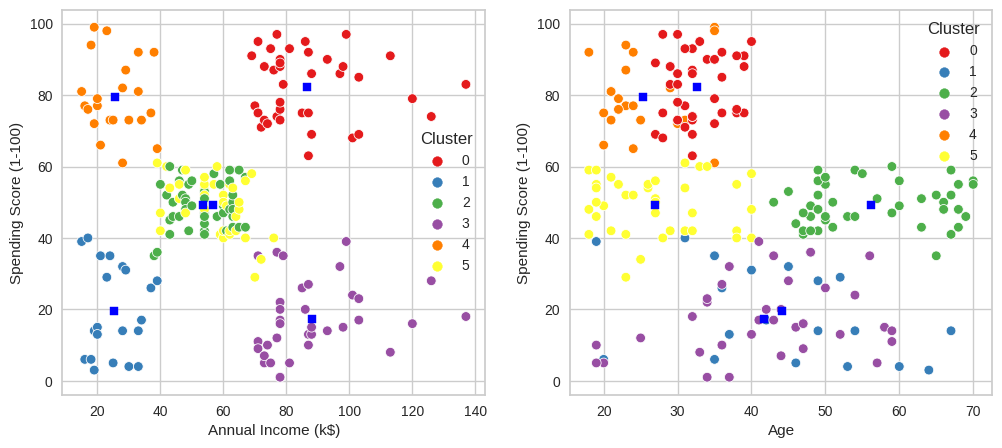

In [42]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

6개의 알고리즘을 만들었는데 0. 어린 나의의 중간소득과 중간 소비점수 그룹, 높은 수입과 낮은 소비점수, 어린 고객인데 중간의 소득과 중간 소비점수, 높은 소비점수와 높은 소득을 가진 고객, 낮은 소비점수와 낮은 소득을 가진 고객, 낮은 소득과 높은 소비점수의 고객! 

In [43]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,39
1,21
2,45
3,35
4,22
5,38


In [45]:
# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



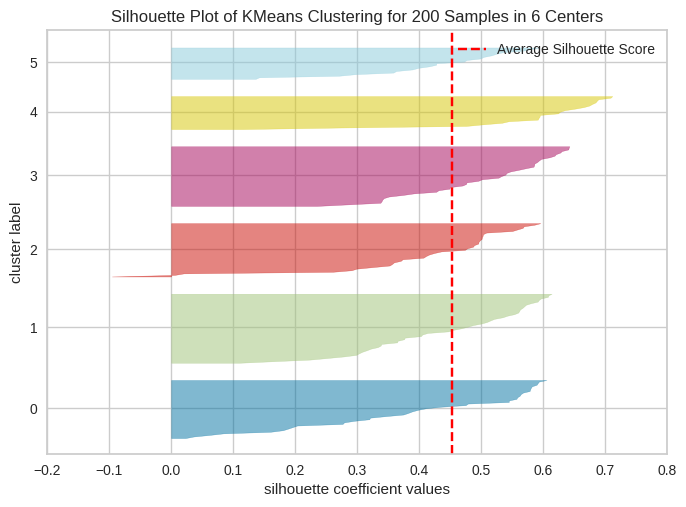

In [46]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

## 4.2 DBSCAN
 이 부분은 DBSCAn 어떻게하는지 알아볼 예정

### 4.2.1 설명
밀도 공간 기반의 클러스터링으로 노이즈와 함께하며 사이킷런 라이브러리로 수행되는 애 중 하나다.

많은 논문에서 제안되었던 dbscan의 핵심 아이디어는 밀집지역이다. 자연 클러스터는 밀집적으로 한 지점 주변ㅇ ㅔ잇다는 가정이다. 이것은 dense region이라는 정의를 필요로 한다. 

최소개수의 점으로 그들 사이의 거리를 재는데 입실론은 포최소값만큼 가까워서는 안되는데 이걸 경게점이라 한다.

nally the distance metric can be specified by a user, but usually Euclidean distance is implemented (like in scikit learn).

A “dense region” is therefore created by a minimum number of points within distance between all of them, Eps. Points which are within this distance but not close to minimum number of other points are treated as “border points”. Remaining ones are noise or outliers. This is shown in the picture below (for MinPts=3). Red points (D) are in a “dense region” – each one has minimum of 3 neighbours within distance Eps. Green points (B) are border ones – they have a neighbour within distance Eps but less than 3. Blue point (O) is an outlier – no neighbours within distance Eps.

DBSCAN.jpg

Advantages of this approach:

it finds number of clusters itself, based on eps and MinPts parameters
It it able to differentiate elongated clusters or clusters surrounded by other clusters in contrary to e.g. K-Means where clusters are always convex.
It is also able to find points not fitting into any cluster – it detects outliers.
The biggest drawback of DBSCAN:

High computational expense of average O(n log(n)) coming from a need to execute a neighbourhood query for each point.
Poorly identifies clusters with various densities


### 4.2.2 Use case - customers segmentation


In [47]:
from sklearn.cluster import DBSCAN
from itertools import product

eps_values = np.arange(8,12.75, 0.25)
min_samples = np.arange(3,10)

DBSCAN_params = list(product(eps_values, min_samples))


DBSCAN은 클러스터를 두개의 파라미터 기반으로 생성하기 때문에 이를 바탕으로 생성되는 클러스터 개수를 확인해야 한다.

In [48]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
  no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
  sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

heatplot이 많은 클러스터가 dbscan에 의해 발생된 것을 알 수 있다.

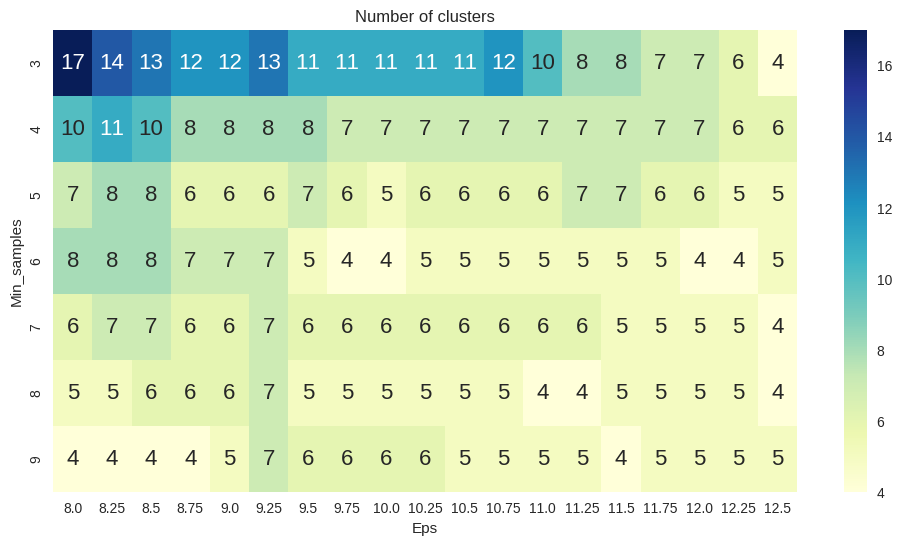

In [49]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

heatplot이 보여주듯 클러스터 숫자가 매우 다양하나 대부분 4-7 이내에서 끝나며 이것을 결정하기 위해서MERIC 실루엣 스코어를 사용하고자 한다.

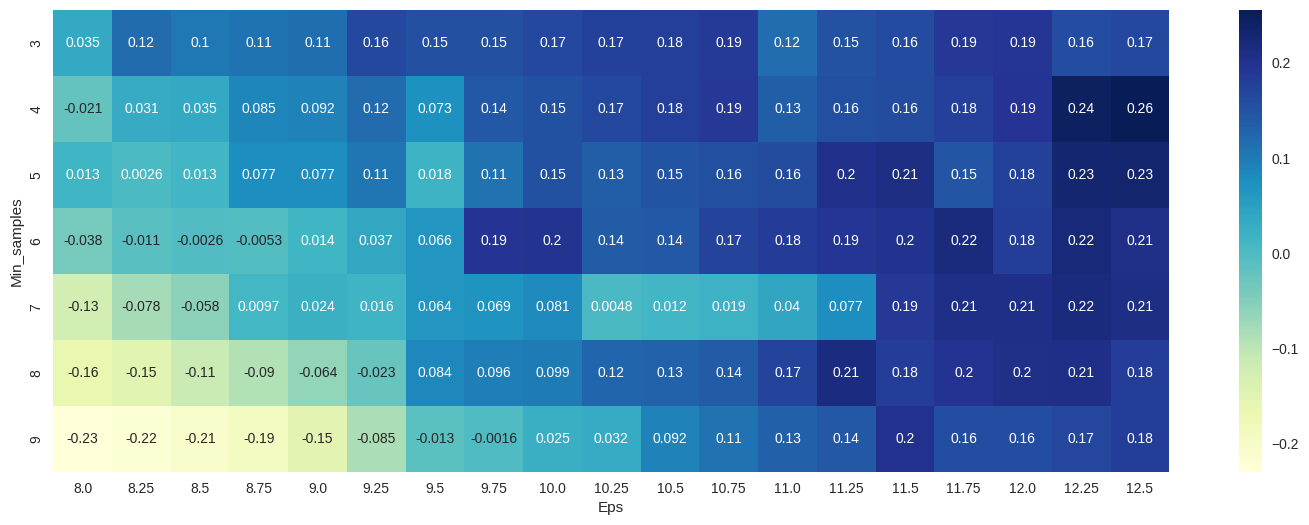

In [50]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

eps 12.5, min_samples=4에 대해 global maximum 은 0.26이 나왔다

In [51]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [52]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


DBSCAN은 5개의 클러스터를 만들었다! 18개의 이상치가 있다.

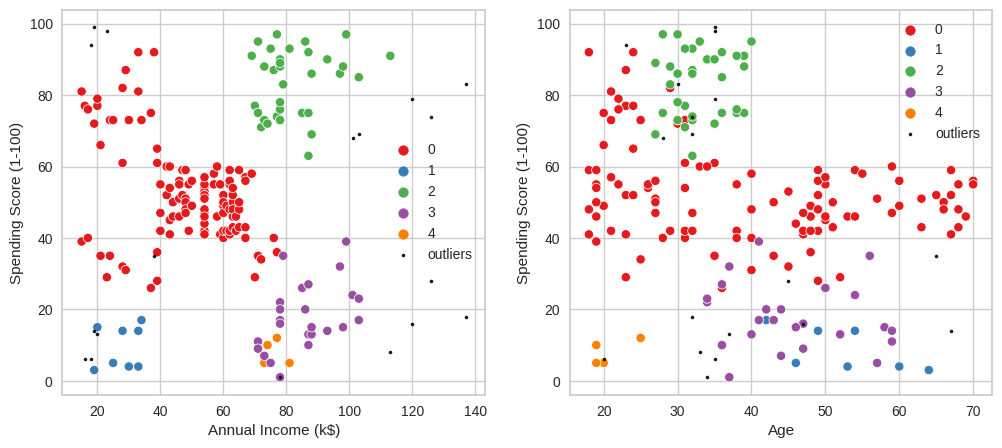

In [54]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)
sns.scatterplot(x='Age', y='Spending Score (1-100)',data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

그래프상에서 이상치가 존재하는 것을 보여주는데 이것은 클러스터로 인정받기에 거리와 최소샘플요건을 충족하지 않는다.

##4.3 Affinity Propagation
이 챕터는 affinity 전파가 어떻게 작동하는지 기술하고 이것의 실행을 보여줄 예정!

###4.3.1 Description
그것이 쌍의 포인트 사이로 수렴할때까지 메세지를 보내는 것으로 이러한 메세지는 얼마나 서로가 exemplar될 수 있는지와 얼마나 그들이 유사한지 측정하는 방식이다. 알고리즘은 최적의 클러스터를 혼자 찾는다. 또한 이것은 n이 샘플 수를 t를 그것이 수렴까지의 반복이라 할 때 이들의 변형곱으로 복잡도를 암시하기 때문에 복잡도가 높은 것을 암시한다. 하지만 초기기준에 대해 민감도가 낮다는 큰 장점이 있다. 

- preference: 음수이며 얼마나 많은 exemplar가 사용되는지 조절하는 파라미터

- damping factor: 메세지를 업데이트할 때 numerical oscillation을 막는 요소

###4.3.2 Use Case - customers segemtation

In [55]:
from sklearn.cluster import AffinityPropagation
no_of_clusteres=[]
preferences = range(-20000, -5000, 100)
af_sil_score = []

for p in preferences:
  AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
  no_of_clusters.append((len(np.unique(AF.labels_))))
  af_sil_score.append(silhouette_score(X_numerics, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index = ['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning:

Affinity propagation did not converge, this model may return degenerate cluster centers and labels.



,preference,clusters,sil_score
82,-11800.0,5.0,0.451649
27,-17300.0,4.0,0.451491
51,-14900.0,6.0,0.451491
52,-14800.0,4.0,0.451440
28,-17200.0,12.0,0.451440


In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(preferences, af_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()
# 안돼서 밑에걸로 대체!

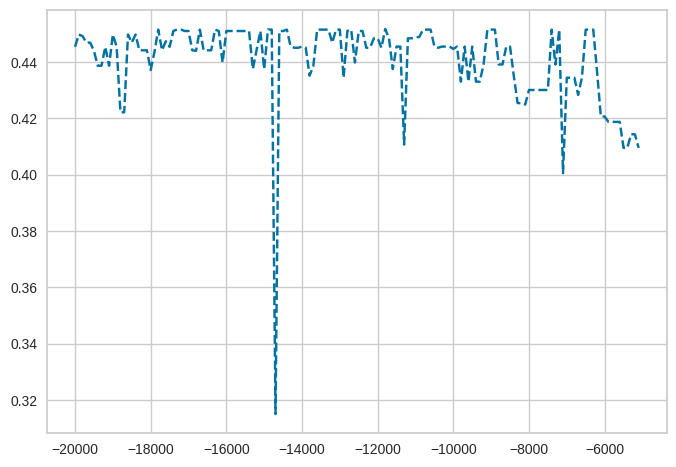

In [74]:
plt.plot(preferences, af_sil_score,linestyle='--')


In [58]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)

In [59]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_

In [60]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


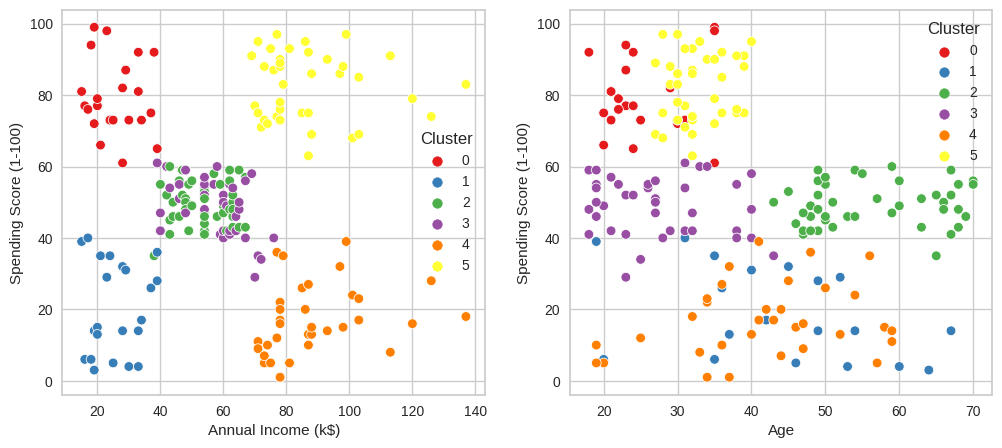

In [63]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot(x='Age',y='Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

affinity propagation에 의해 생성된 클러스터는 비교적 사이즈가 균등한 것으로 kmeans와 비슷하댜.

#5. 비교 및 논의
세개의 알고리즘에 의해 생성된 클러스터를 비교하고 논의해보자

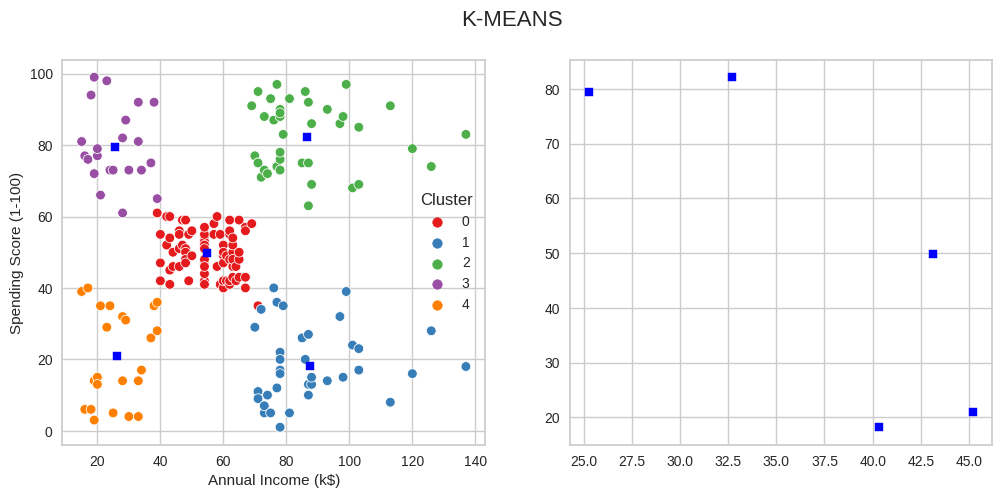

In [64]:
fig1.suptitle('K-MEANS', fontsize=16)
fig1

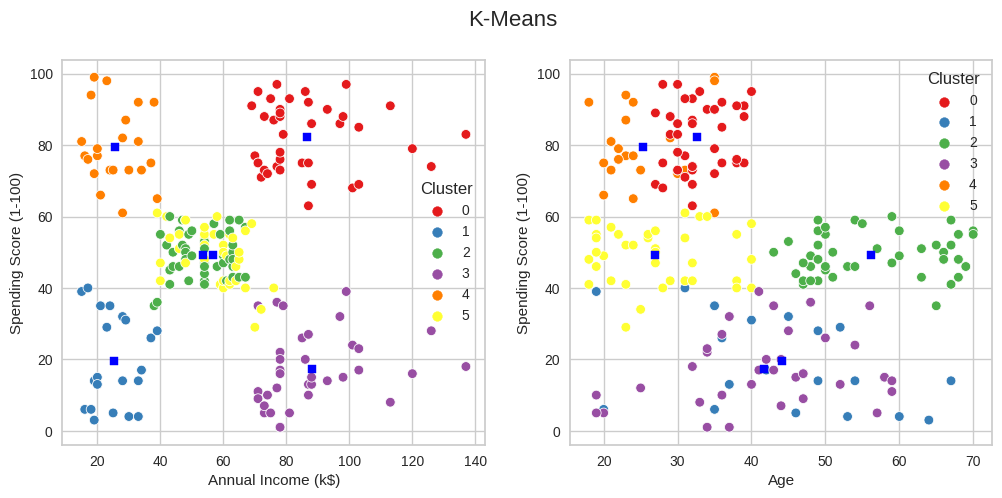

In [65]:
fig11.suptitle('K-Means', fontsize=16)
fig11

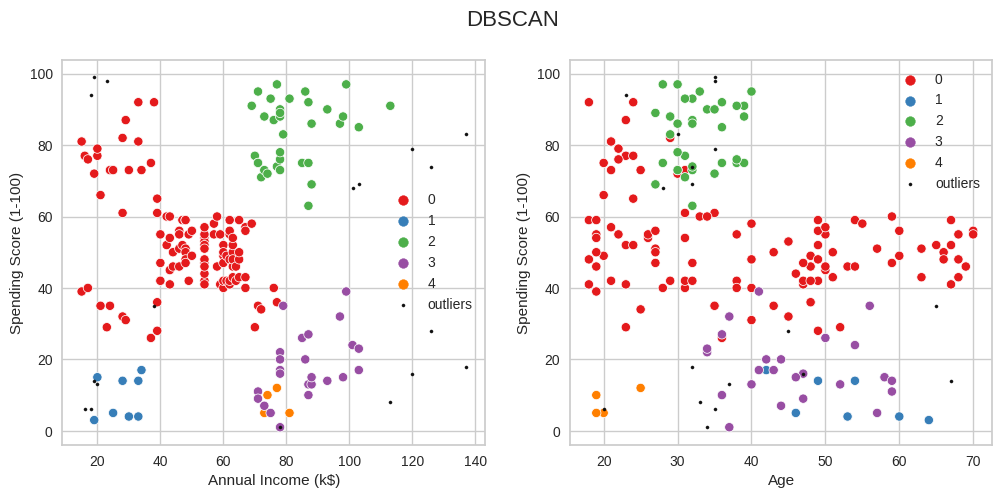

In [66]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

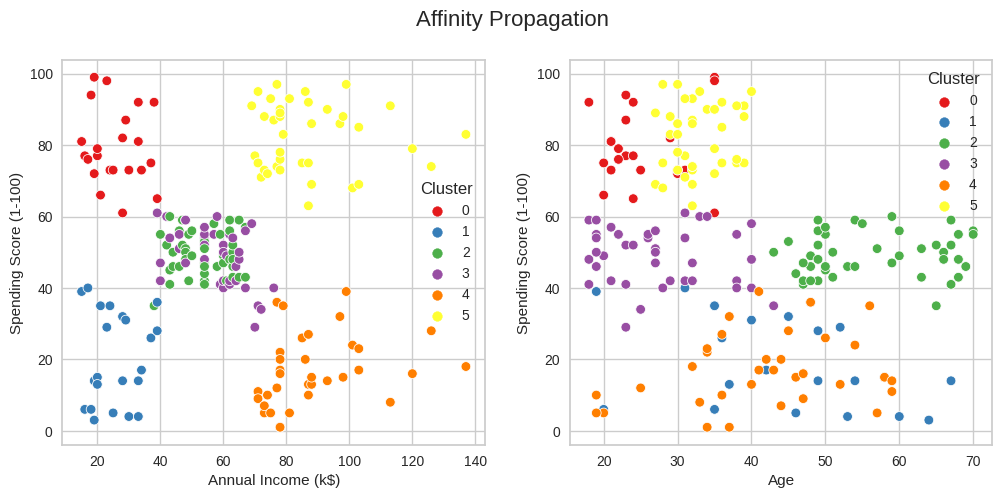

In [67]:
fig3.suptitle('Affinity Propagation', fontsize=16)
fig3

생성된 클러스터의 사이즈를 보여주는 표를 보자. 클러스터의 숫자는 각 방법마다 다르다는 것을 기억해야함! 예를 들어 kmeans에서의 0번째 클러스터는 dbscan에서의 2번째, aP에서의 2번째와 동일해!

In [68]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes], axis=1, sort=False)
clusters

,KM_size,DBSCAN_size,AF_size
Cluster,,,
0,39.0,112.0,22.0
1,21.0,8.0,22.0
2,45.0,34.0,44.0
3,35.0,24.0,39.0
4,22.0,4.0,34.0
5,38.0,NaN,39.0
-1,NaN,18.0,NaN


위의 비교로부터 DBSCAN이 합리적인 클러스터 생성에 실패했다는 것을 알 수 있다. 이것은 dbscan이 밀도의 한 점기반의 클러스터를 찾는데 실패했기때문이다. 만약 하나의 클러스터가 덜 밀집도어 있다면 dbscan은 재구성하는 것이 아닌 아마 suboptimal 한 결과를 낼 것이다.

kmeans와 ap가 합리적인 6개의 클러스터를 잘 냈다!